# **Exercise 5**: Model scenario analysis

In this exercises we will do a scenario analysis with the model created with notebook 01.
We will update the sea level boundary condition to simulate the effect of sea level rise on flood risk in Savannah.
You can use this notebook as template to run other scenario analyses to e.g. assess the effect of adaptation measures, land use changes, or future climate conditions.

The steps to do so are:
- Step 1: Read the model a change the output root folder to a new directory
- Step 2: Update the model and save it. This can be the sea level boundary condition, or any other model parameter you want to change.
- Step 3: Run the model again
- Step 4: Inspect the differences in the results (flood extent, flood depth, etc.)

## **Step 0:** Import dependencies

Before anything else we need to import the required packages

In [3]:
from pathlib import Path

import geopandas as gpd
import numpy as np
import pandas as pd
import hydromt
from hydromt.log import setuplog
from hydromt_sfincs import SfincsModel

# local script
from sfincs_utils import run_sfincs

## **Step 1:** Read the model a change the output root
Now let's copy our old model to a new folder, so we can always look at the old model later on:

In [4]:
model_root_old = '..\models\sfincs_savannah_T100_slr'
model_root_original = '..\models\sfincs_savannah_T100'

# initialize the old model again with a logger and the data catalog
# but now in read-only mode
logger = setuplog("SFINCS_log_savannah", log_level=20)
sf = SfincsModel(root=model_root_old, mode="r", logger=logger)
sf.read()

# change the model root (to not overwrite existing model)
# it is recommended to use a different root_folder for each model run
# make sure to keep your folders well organized
# NOTE that this does not copy any data, it just points to a new location where the model will be saved later
# sf.set_root(model_root_new, mode="w+")

2026-01-30 10:39:57,882 - SFINCS_log_savannah - log - INFO - HydroMT version: 0.10.1
2026-01-30 10:39:57,907 - SFINCS_log_savannah - model_api - INFO - Initializing sfincs model from hydromt_sfincs (v1.2.1).
2026-01-30 10:39:57,926 - SFINCS_log_savannah - sfincs - WARNING - depfile not found at c:\Users\sanne\integrated-modelling-in-hydrology\2_flood_risk\models\sfincs_savannah_T100_slr\sfincs.dep
2026-01-30 10:40:11,734 - SFINCS_log_savannah - sfincs - WARNING - Index in bndfile does not match c:\Users\sanne\integrated-modelling-in-hydrology\2_flood_risk\models\sfincs_savannah_T100_slr\gis\bnd.geojson
2026-01-30 10:40:11,752 - SFINCS_log_savannah - sfincs - WARNING - Index in bndfile does not match c:\Users\sanne\integrated-modelling-in-hydrology\2_flood_risk\models\sfincs_savannah_T100_slr\gis\bnd.geojson
2026-01-30 10:40:11,759 - SFINCS_log_savannah - sfincs - INFO - Model read


## **Step 2:** Update forcing

Now we will update the forcing of the model. We will use the same forcing as in the previous exercise, but will now add an offset to the water levels to simulate sea level rise.

Note that the index attribute of the locations matches with the column names of the timeseries file. This is important for HydroMT to know which timeseries belongs to which location!

In [33]:
# # read  location
# locations = gpd.read_file(
#     Path(r"../data/gtsm_codec_reanalysis_hourly_v1/gauging_location.geojson")
# )
# locations = locations.set_index('id')
# locations

In [34]:
# # read design hydrographs
# timeseries = pd.read_csv(
#     Path(r"../data/water_levels/sim_timeseries_T100.csv"),
#     index_col=0,
#     parse_dates=True,
# )
# # clip to model event period
# tstart, tstop = sf.get_model_time()
# timeseries = timeseries.loc[tstart:tstop]
# timeseries.iloc[[0, 1, -2, -1], :]

In [35]:
# # estimate the sea level rise in 2100
# # hint use the IPCC AR6 interactive atlas via https://interactive-atlas.ipcc.ch/regional-information
# # select the right variable, period en scenario, then click on the region of interest to get the a graph or table from which you can estimate the sea level rise
# slr = 1 # [m] FILL IN YOUR ESTIMATE HERE

# timeseries_slr = timeseries.copy()
# # change the event period to 2100
# timeseries_slr.index = (
#     timeseries.index - timeseries.index[0] + pd.Timestamp("2100-01-01")
# )
# # add sea level rise to the timeseries
# timeseries_slr = timeseries_slr + slr

In [36]:
# # we need to update the model event time to the new period
# # which we can do based on the timeseries index
# sf.setup_config(
#     tref=timeseries_slr.index[0].to_pydatetime(),
#     tstart=timeseries_slr.index[0].to_pydatetime(),
#     tstop=timeseries_slr.index[-1].to_pydatetime(),
# )

# # this time we provide the locations and timeseries as
# # pandas / geopandas objects instead of the data catalog keys
# sf.setup_waterlevel_forcing(
#     locations=locations,
#     timeseries=timeseries_slr,
#     merge=False,
#     # use a large buffer to include all points if the following error is raised
#     # ValueError: The gdf_locs index and df_ts columns must be the same
#     buffer=1e5,  # buffer from model boundary [m]
# )

# sf.plot_forcing("forcing.png")

Save the model after updating the forcing.

In [37]:
# # make sure to write the updated model to the new model root before running sfincs
# sf.write()

## **Step 3:** Rerun the model, using the new boundary conditions

In [38]:
# # NOTE you need to download the SFINCS executable first (see first notebook) and update the path below
# sfincs_exe = "../software/sfincs_v2.1.1/sfincs.exe"
# run_sfincs(
#     Path(sf.root, "sfincs.inp"), # path to the SFINCS model root folder
#     run_method="exe", # run SFINCS using the executable, other options are "docker" or "singularity"
#     sfincs_exe=sfincs_exe, # path to the sfincs executable if you want to run SFINCS on windows
# )


## **Step 4:** Inspecting the results: floodmap

Inspect the results of the updated model run by plotting the maximum water depths on a map. 
In order to do so you should first read the results of the model (*sf.read_results()*). After this you can access the results by using the results attribute: *sf.results*.
The results you can plot using matplotlib.

*Tip: Print all available result keys by typing `print(sf.results.keys())`*  
*Tip:* You can also plot the results on top of the SFINCS basemap

In [5]:
# hmax is computed by SFINCS and read-in from the sfincs_map.nc file
sf.read_results()

2026-01-30 10:40:14,997 - SFINCS_log_savannah - model_api - WARNING - Replacing result: inp
2026-01-30 10:40:14,999 - SFINCS_log_savannah - model_api - WARNING - Replacing result: msk
2026-01-30 10:40:15,001 - SFINCS_log_savannah - model_api - WARNING - Replacing result: zb
2026-01-30 10:40:15,002 - SFINCS_log_savannah - model_api - WARNING - Replacing result: zs
2026-01-30 10:40:15,004 - SFINCS_log_savannah - model_api - WARNING - Replacing result: zsmax
2026-01-30 10:40:15,005 - SFINCS_log_savannah - model_api - WARNING - Replacing result: total_runtime
2026-01-30 10:40:15,006 - SFINCS_log_savannah - model_api - WARNING - Replacing result: average_dt
2026-01-30 10:40:15,007 - SFINCS_log_savannah - model_api - WARNING - Replacing result: status


Text(0.5, 1.0, 'SFINCS maximum water depth, T100')

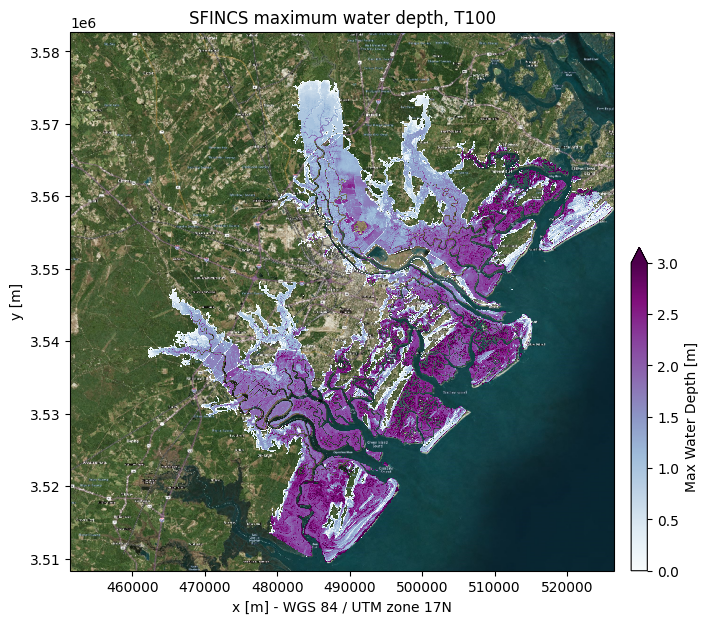

In [6]:
# We use the subgrid resolution topography to downscale the maximum water level to water depth at the subgrid resolution
# First, we read the subgrid resolution topography and check if the file exists
dep_subgrid_file = Path(model_root_original, "subgrid", "dep_subgrid.tif")  
dep_subgrid = hydromt.open_raster(dep_subgrid_file, nodata=np.nan) # elevation at subgrid resolution

# calculate the maximum water depth (hmax) as the difference between 
# the maximum water level (zsmax) and the elevation (dep)
zsmax = sf.results["zsmax"].max(dim="timemax") # maximum water level
zsmax_subgrid = zsmax.raster.reproject_like(dep_subgrid, method="nearest")  # reproject to subgrid resolution
hmax_subgrid = np.maximum(0, zsmax_subgrid - dep_subgrid).round(2).astype(np.float32) # maximum water depth
# Here, we assume that all areas with a negative depth are permanent water bodies
# This is a strong simplification. It is better to use a more sophisticated approach
# to identify permanent water bodies, e.g. based on a water mask or a "tide-only" simulation.
######################################################################################################### Comment In #################
permament_water = dep_subgrid < 0 
hmax_subgrid = hmax_subgrid.where(~permament_water, np.nan) # mask areas with permanent water
#######################################################################################################################################
# update (geospatial) metadata
hmax_subgrid.raster.set_crs(dep_subgrid.raster.crs)
hmax_subgrid.raster.set_nodata(np.nan)
hmax_subgrid.name = "max water depth"
hmax_subgrid.attrs["units"] = "m"

fig, ax = sf.plot_basemap(
    fn_out="hmax.png",  # save figure to mod.root/figs/hmax.png
    variable=hmax_subgrid,
    plot_bounds=False, plot_geoms=False,
    bmap="sat",
    zoomlevel=12,
    figsize=(11, 7),
    vmin=0,  # set minimum value for colorbar
    vmax=3,  # set maximum value for colorbar
    cmap="BuPu",     
    cbar_kwargs={
        "pad": 0.02,       # Heel dicht bij de kaart (standaard is vaak 0.05 of meer)
        "shrink": 0.6,     # Zelfde hoogte als de andere balk (voor symmetrie)
        "anchor": (0.0, 0.0),
        "label": "Max Water Depth [m]" # Label hier expliciet opgeven is vaak netter
    }
)
ax.set_title("SFINCS maximum water depth, T100")

NameError: name 'mpatches' is not defined

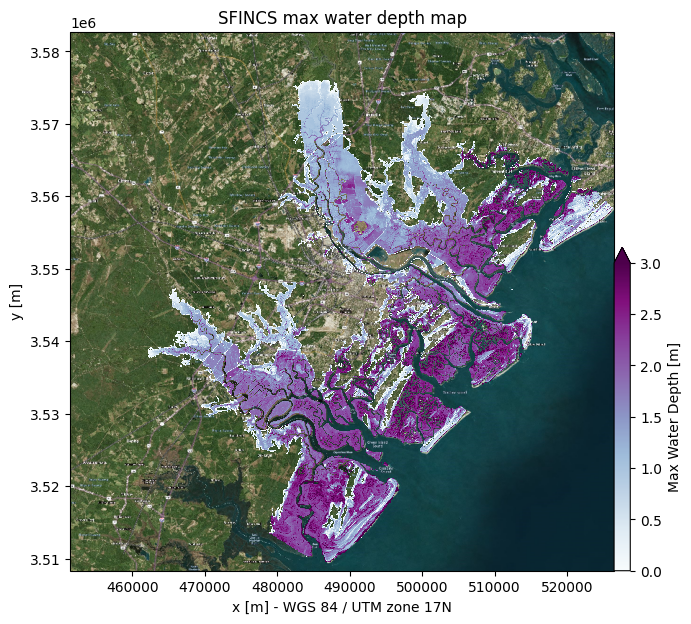

In [7]:
# We use the subgrid resolution topography to downscale the maximum water level to water depth at the subgrid resolution
# First, we read the subgrid resolution topography and check if the file exists
dep_subgrid_file = Path(model_root_old, "subgrid", "dep_subgrid.tif")  
if not dep_subgrid_file.exists():
    raise FileNotFoundError(
        f"Subgrid resolution topography file not found: {dep_subgrid_file}. "
    )
dep_subgrid = hydromt.open_raster(dep_subgrid_file, nodata=np.nan) # elevation at subgrid resolution

# calculate the maximum water depth (hmax) as the difference between 
# the maximum water level (zsmax) and the elevation (dep)
zsmax = sf.results["zsmax"].max(dim="timemax") # maximum water level
zsmax_subgrid = zsmax.raster.reproject_like(dep_subgrid, method="nearest")  # reproject to subgrid resolution
hmax_subgrid = np.maximum(0, zsmax_subgrid - dep_subgrid).round(2).astype(np.float32) # maximum water depth
# Here, we assume that all areas with a negative depth are permanent water bodies
# This is a strong simplification. It is better to use a more sophisticated approach
# to identify permanent water bodies, e.g. based on a water mask or a "tide-only" simulation.
permament_water = dep_subgrid < 0 
hmax_subgrid = hmax_subgrid.where(~permament_water, np.nan) # mask areas with permanent water
# update (geospatial) metadata
hmax_subgrid.raster.set_crs(dep_subgrid.raster.crs)
hmax_subgrid.raster.set_nodata(np.nan)
hmax_subgrid.name = "max water depth"
hmax_subgrid.attrs["units"] = "m"

fig, ax = sf.plot_basemap(
    fn_out="hmax.png",  # save figure to mod.root/figs/hmax.png
    variable=hmax_subgrid,
    plot_bounds=False, plot_geoms=False,
    bmap="sat",
    zoomlevel=12,
    figsize=(11, 7),
    vmin=0,  # set minimum value for colorbar
    vmax=3,  # set maximum value for colorbar
    cmap="BuPu",    
    cbar_kwargs={
        "pad": 0.00,       # Heel dicht bij de kaart (standaard is vaak 0.05 of meer)
        "shrink": 0.6,     # Zelfde hoogte als de andere balk (voor symmetrie)
        "anchor": (0.0, 0.0),
        "label": "Max Water Depth [m]" # Label hier expliciet opgeven is vaak netter
    }
)

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 2. Maak een witte rechthoek
bg_veil = mpatches.Rectangle(
    (xlim[0], ylim[0]),           # Startpunt (links-onder)
    xlim[1] - xlim[0],            # Breedte
    ylim[1] - ylim[0],            # Hoogte
    facecolor='white',            # Wit maakt het lichter (gebruik 'grey' voor donkerder)
    alpha=0.4,                    # 0.4 = 40% witheid eroverheen (speel hiermee: 0.1 - 0.5)
    zorder=0.5                    # CRUCIAAL: Basemap is z=0, Data is vaak z=1. Dit zit ertussen.
)

# 3. Voeg toe aan de as
ax.add_patch(bg_veil)

hmax_subgrid.plot(
    ax=ax,
    cmap="BuPu",        # Zelfde kleuren
    vmin=-limit,        # Zelfde limieten
    vmax=limit,
    add_colorbar=False, # BELANGRIJK: Geen tweede balk maken
    zorder=2            # Hoger dan de sluier (die was 1)
)
ax.set_title("SFINCS maximum water depth, T100 +1m slr")

In [41]:
# # save the results to a geotiff file
# # round to 2 decimals to reduce file size

# hmax_subgrid.raster.set_nodata(np.nan)
# hmax_subgrid.round(2).raster.to_raster(
#     Path(sf.root, f"hmax_slr{int(slr*100)}.tif"),
#     compress="lzw",
#     overwrite=True,
#     dtype="float32",
# )

Text(0.5, 1.0, 'Water Depth Difference Map: SLR (+1m) vs. Current T100')

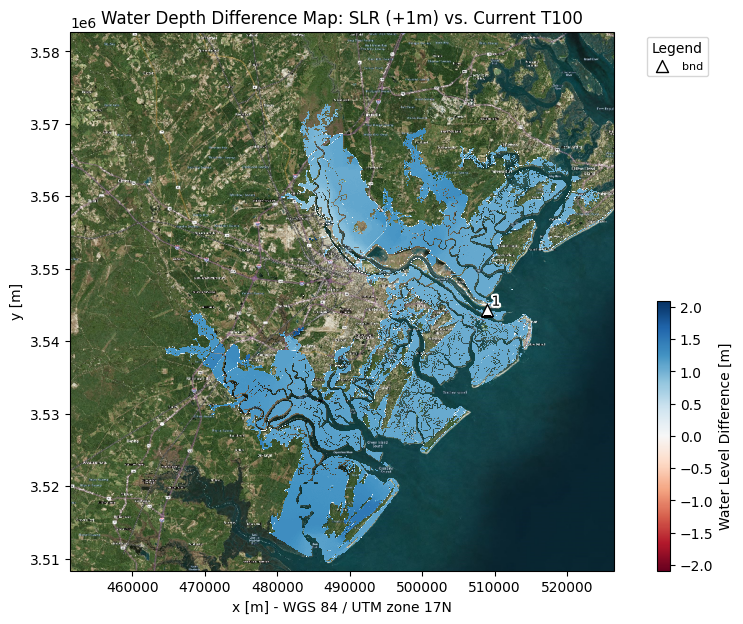

In [9]:
# load the original maximum water depth and create a difference map
# adapt and complete the code below
slr = 1

hmax_org_file = Path(model_root_original, "hmax.tif")
hmax_org = hydromt.open_raster(hmax_org_file)

diff_map = hmax_subgrid - hmax_org
diff_map.name = "Water Level Difference"
diff_map.attrs["long_name"] = "Water Level Difference"
diff_map.attrs["units"] = "m"

min_val = diff_map.min().compute().item()
max_val = diff_map.max().compute().item()

limit = max(abs(min_val), abs(max_val))

fig, ax = sf.plot_basemap(
        variable=diff_map,
        plot_bounds=False,
        bmap="sat",      # Achtergrondkaart
        zoomlevel=12,
        figsize=(11, 7),
        vmin=-limit,       # Minimumwaarde voor de kleurenbalk (pas aan indien nodig)
        vmax=limit,        # Maximumwaarde voor de kleurenbalk
        cmap="RdBu",     # Rood (afname) naar Blauw (toename)
        # levels=20
    )
    
    # Voeg een titel toe
ax.set_title(f"Water Depth Difference Map: SLR (+{slr}m) vs. Current T100")

Reprojecting critical areas from EPSG:4326 to EPSG:32617


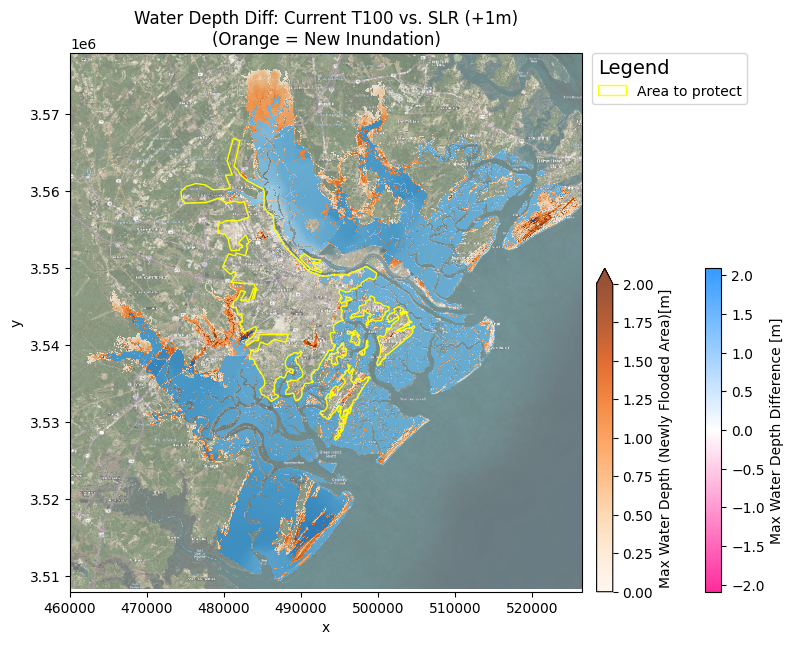

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

colors = ["deeppink", "white", "dodgerblue"] 

# 2. Maak de colormap aan
cmap_pink_blue = LinearSegmentedColormap.from_list("PinkWhiteBlue", colors)

# Aanname: '0' of 'NaN' betekent droog. We vervangen NaNs tijdelijk door 0 voor de vergelijking.
hmax_org_filled = hmax_org.fillna(0)
hmax_sub_filled = hmax_subgrid.fillna(0)

# Masker A: Gebieden die in BEIDE scenario's nat zijn (waar we het verschil willen zien)
mask_existing_wet = (hmax_org_filled > 0) & (hmax_sub_filled > 0)

# Masker B: Gebieden die EERST droog waren en NU nat zijn (nieuwe overstroming)
mask_newly_flooded = (hmax_org_filled == 0) & (hmax_sub_filled > 0)

# Creëer de twee datasets
# 1. Verschilkaart (alleen waar het al nat was)
diff_map_existing = (hmax_subgrid - hmax_org).where(mask_existing_wet)
diff_map_existing.name = "Water Level Difference"

# 2. Nieuw overstroomd (toon hier de nieuwe diepte)
newly_flooded_depth = hmax_subgrid.where(mask_newly_flooded)
newly_flooded_depth.name = "New Flood Depth"

# Bepaal limieten voor de RdBu schaal (alleen gebaseerd op het verschil in bestaande gebieden)
min_val = diff_map_existing.min().compute().item()
max_val = diff_map_existing.max().compute().item()
limit = max(abs(min_val), abs(max_val))

# --- STAP 2: Plotten ---

# Plot laag 1: Het verschil in bestaande gebieden (RdBu)
# We gebruiken jouw sf.plot_basemap functie als basis
fig, ax = sf.plot_basemap(
    variable=diff_map_existing,
    plot_bounds=False,
    bmap="sat",
    zoomlevel=12,
    figsize=(11, 7),
    vmin=-limit,
    vmax=limit, plot_geoms=False,
    cmap=cmap_pink_blue,
    alpha=0.9, # Iets transparantie zodat de basemap zichtbaar blijft
    cbar_kwargs={
        "pad": 0.00,       # Heel dicht bij de kaart (standaard is vaak 0.05 of meer)
        "shrink": 0.6,     # Zelfde hoogte als de andere balk (voor symmetrie)
        "anchor": (0.0, 0.0),
        "label": "Max Water Depth Difference [m]" # Label hier expliciet opgeven is vaak netter
    }
)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 2. Maak een witte rechthoek
bg_veil = mpatches.Rectangle(
    (xlim[0], ylim[0]),           # Startpunt (links-onder)
    xlim[1] - xlim[0],            # Breedte
    ylim[1] - ylim[0],            # Hoogte
    facecolor='white',            # Wit maakt het lichter (gebruik 'grey' voor donkerder)
    alpha=0.4,                    # 0.4 = 40% witheid eroverheen (speel hiermee: 0.1 - 0.5)
    zorder=0.5                    # CRUCIAAL: Basemap is z=0, Data is vaak z=1. Dit zit ertussen.
)

# 3. Voeg toe aan de as
ax.add_patch(bg_veil)

diff_map_existing.plot(
    ax=ax,
    cmap="RdBu",        # Zelfde kleuren
    vmin=-limit,        # Zelfde limieten
    vmax=limit,
    add_colorbar=False, # BELANGRIJK: Geen tweede balk maken
    zorder=2            # Hoger dan de sluier (die was 1)
)

new_plot = newly_flooded_depth.plot(
    ax=ax,
    cmap="Oranges",
    vmin=0,
    vmax=2.0,
    add_colorbar=True,
    # Pas hier de grootte aan
    cbar_kwargs={
        "label": "Max Water Depth (Newly Flooded Area)[m]",
        "shrink": 0.6,      # Maak de balk kleiner (70% van de as-hoogte)
        "aspect": 20,       # Hoe 'dik' de balk is (hoger getal = dunner)
        "pad": 0.02,        # Afstand tot de plot/andere colorbar
        "anchor": (0.0, 0.0) # Centreer de balk verticaal
    },
    alpha=0.8
)
import geopandas as gpd

# 1. Laad het bestand
critical_areas_file = "../data_processed/Critical_areas.gpkg"
gdf_critical = gpd.read_file(critical_areas_file)

# 2. Zorg dat het coördinatenstelsel (CRS) matcht met je rasters
# Dit is essentieel voor een correcte overlap
if gdf_critical.crs != hmax_org.rio.crs:
    print(f"Reprojecting critical areas from {gdf_critical.crs.to_string()} to {hmax_org.rio.crs.to_string()}")
    gdf_critical = gdf_critical.to_crs(hmax_org.rio.crs)

fill_color_rgba = (1.0, 0.0, 1.0, 0.0)
edge_color_solid = "yellow" # Pas aan naar wens (bijv. ook 'magenta')

# 4. Plot de laag
gdf_critical.plot(
    ax=ax,                      # Teken op dezelfde as
    facecolor=fill_color_rgba,  # De transparante magenta vulling
    edgecolor=edge_color_solid, # De massieve rand
    linewidth=1.0,              # Dikte van de rand
    # alpha=...                 # BELANGRIJK: Gebruik deze NIET, anders overschrijf je de RGBA instellingen hierboven
    zorder=15,                  # Zorg dat dit bovenop de waterlagen (die vaak zorder 1-10 hebben) ligt
    label="Areas to protect"                   
)

from matplotlib.lines import Line2D # Nodig voor de legenda lijn

# --- STAP 1: Data Laden & Filteren ---

# structures_file = "../data_processed/levees_and_weirs.geojson"
# gdf_structures = gpd.read_file(structures_file)

# # Check projectie
# if gdf_structures.crs != hmax_org.rio.crs:
#     gdf_structures = gdf_structures.to_crs(hmax_org.rio.crs)

# gdf_structures.plot(
#     ax=ax,
#     color="black",      # Zwart voor de structuur
#     linewidth=3.0,linestyle='--',      # Dikke lijn
#     zorder=20           # Ligt BOVENOP de kritieke gebieden (die waren 15)
# )





# 1. Maak je nieuwe handmatige legenda-item
new_handle = mpatches.Patch(
    facecolor=(1.0, 0.0, 1.0, 0.0), 
    edgecolor='yellow', 
    linewidth=1.0, 
    label='Area to protect'
)

# 2. Haal de items op die er al stonden (vanuit plot_basemap of andere lagen)
# handles = de symbolen, labels = de tekst
handles, labels = ax.get_legend_handles_labels()

# 3. Voeg jouw nieuwe item toe aan de bestaande lijst
handles.append(new_handle)
labels.append(new_handle.get_label())

ax.legend(
    title="Legend", title_fontsize=14, alignment="left",
    handles=handles, 
    labels=labels, 
    loc='upper left',          # Welk punt van de legenda-box gebruiken we als anker? (Links-boven)
    bbox_to_anchor=(1.02, 1),  # Waar pinnen we dat punt vast? (X=1.02 is iets rechts van de kaart, Y=1 is bovenkant)
    borderaxespad=0,           # Geen extra witruimte tussen anker en box
    frameon=True               # Zet er een wit kader omheen (ziet er vaak netter uit buiten de kaart)
)
ax.set_title(f"Water Depth Diff: Current T100 vs. SLR (+{slr}m)\n(Orange = New Inundation)")
ax.set_xlim(460000)
ax.set_ylim(3.508*10**6, 3.578*10**6)

plt.show()

# Exercise 5b: Adaptation measure scenario analysis

Implement the same for other scenario analyses, e.g. by implementing an adaptation measure such as a levee or floodwall.

You can do this by implementing a [weir structure](https://sfincs.readthedocs.io/en/latest/input_structures.html#weirs) in the model.

This is done by drawing a line geometry file in e.g. QGIS or geojson.io of the levee/floodwall location. Each line should have a height "z" attribute value which defines the crest height. The weir can then be added to the model using the HydroMT-SFINCS method [setup_structures()](https://deltares.github.io/hydromt_sfincs/stable/_generated/hydromt_sfincs.SfincsModel.setup_structures.html#hydromt_sfincs.SfincsModel.setup_structures)

We suggest you make a copy of the notebook and implement the changes there following the steps as above.